## Image Classification


Image classification is one of the important use cases in our daily life. Automotive, e-commerce, retail, manufacturing industries, security, surveillance, healthcare, farming etc., can have a wide application of image classification.

**Objective:** In this notebook, we will build a neural network to classifiy the image based on the object present in the image.



## Advanced techniques for training neural networks

Weight Initialization

Nonlinearity (different Activation functions)

Optimizers(different optimizers)

Batch Normalization

Dropout

### About Dataset


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

#### Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

### Load dataset

Fashion-MNIST dataset


In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import matplotlib.pyplot as plt
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [3]:
tensorflow.__version__

'2.12.0'

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
X_train.shape[0]

60000

In [6]:
y_train.shape

(60000,)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

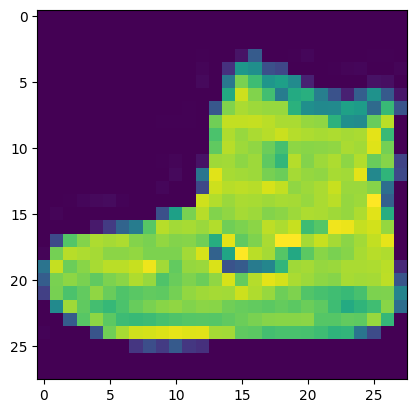

Label:  9


In [9]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])


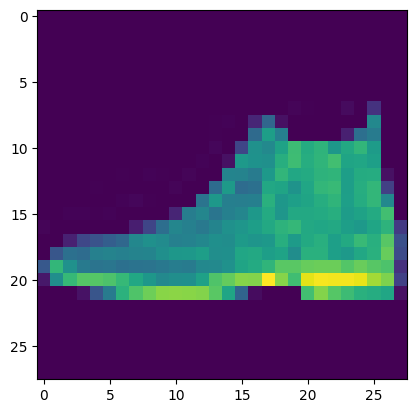

Label:  9


In [10]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

### Data Pre-processing

In [11]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [12]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


### Basic NN model

Naive MLP model without any alterations

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [15]:
model = Sequential()

In [16]:
  model.add(Dense(50, input_shape = (784, )))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(50))
  model.add(Activation('sigmoid'))
  model.add(Dense(10))
  model.add(Activation('softmax'))

In [17]:
sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 50, verbose = 1)

In [ ]:
results = model.evaluate(X_test, y_test)

In [ ]:
print('Test accuracy: ', results[1])

### 1. Weight Initialization

Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree

Ref: https://keras.io/initializers/

In [21]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [22]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size=200, epochs = 20, verbose = 1)

Epoch 1/100
300/300 [==============================] - 2s 4ms/step - loss: 2.4061 - accuracy: 0.1000
Epoch 2/100
300/300 [==============================] - 1s 3ms/step - loss: 2.3489 - accuracy: 0.1079
Epoch 3/100
300/300 [==============================] - 1s 3ms/step - loss: 2.3212 - accuracy: 0.1337
Epoch 4/100
300/300 [==============================] - 1s 3ms/step - loss: 2.3074 - accuracy: 0.1641
Epoch 5/100
300/300 [==============================] - 1s 3ms/step - loss: 2.3001 - accuracy: 0.1904
Epoch 6/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2958 - accuracy: 0.2173
Epoch 7/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2931 - accuracy: 0.2451
Epoch 8/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2910 - accuracy: 0.2660
Epoch 9/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2893 - accuracy: 0.2862
Epoch 10/100
300/300 [==============================] - 1s 3ms/step - loss: 2.2877 - accura

KeyboardInterrupt: ignored

In [ ]:
results = model.evaluate(X_test, y_test)

In [ ]:
print('Test accuracy: ', results[1])

### 2. Nonlinearity (Activation function)

Sigmoid functions suffer from gradient vanishing problem, making training slower

There are many choices apart from sigmoid and tanh; try many of them!

'relu' (rectified linear unit) is one of the most popular ones

Ref: https://keras.io/activations/

In [23]:
def mlp_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

In [ ]:
results = model.evaluate(X_test, y_test)


In [ ]:
print('Test accuracy: ', results[1])

### 3. Batch Normalization

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity

Ref: https://keras.io/optimizers/

In [27]:
from tensorflow.keras.layers import BatchNormalization, Dropout


Batch normalization layer is usually inserted after dense/convolution and before nonlinearity



In [25]:
def mlp_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 20, verbose = 1)


In [29]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3974 - accuracy: 0.8593


In [ ]:
print('Test accuracy: ', results[1])


### Dropout

In [31]:
def mlp_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))

    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 10, verbose = 1)

In [ ]:
results = model.evaluate(X_test, y_test)

In [ ]:
print('Test accuracy: ', results[1])
